# Practice Session 05: Network models


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

# 1. Random (ER) graph generator

In [2]:
def flip_coin(p):
    if np.random.random() < p:
        return True
    else:
        return False

In [3]:
def generate_random_graph(N, p):
    g = nx.Graph()
    for n in range(N):
        g.add_node(n)
    node_list = g.nodes()
    for u in node_list:
        for v in node_list:
            if u != v:
                if flip_coin(p) == True:
                    g.add_edge(u, v)
    return g

In [4]:
def print_er_statistics(g, p):
    sum_degree = 0
    for n in g.nodes():
        sum_degree += g.degree(n)
    actual_average_degree = sum_degree / len(g.nodes())
    expected_average_degree = (len(g.nodes()) - 1) * p
    return actual_average_degree, expected_average_degree

In [5]:
def plot_degree_distribution(g):
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1,np.max(degree_sequence)+2), density=True)
    plt.loglog(bin_edges[:-1], prob, '.', marker='o')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.show()

=== Nodes ===
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Number of nodes: 100

=== Edges ===
[(0, 53), (0, 95), (0, 3), (0, 35), (0, 51), (1, 41), (1, 62), (1, 78), (1, 3), (1, 44), (2, 4), (2, 19), (2, 54), (2, 57), (3, 51), (3, 63), (3, 86), (3, 62), (3, 80), (4, 15), (5, 70), (5, 89), (5, 59), (5, 77), (6, 77), (6, 7), (6, 20), (7, 20), (8, 77), (8, 40), (9, 13), (10, 99), (11, 20), (11, 93), (12, 15), (12, 21), (12, 34), (12, 41), (12, 76), (12, 42), (12, 66), (12, 98), (13, 21), (13, 68), (13, 17), (13, 29), (13, 99), (14, 31), (14, 68), (14, 41), (14, 76), (14, 86), (15, 56), (15, 85), (15, 32), (15, 81), (16, 23), (16, 92), (16, 18), (16

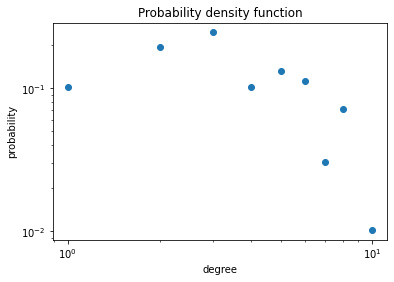

In [6]:
p = 0.02
g = generate_random_graph(100, p)
print("=== Nodes ===")
print(g.nodes())
print("Number of nodes:", len(g.nodes()))
print("===========" * 10)
print("")
print("=== Edges ===")
print(g.edges())
print("Number of edges:", len(g.edges()))
print("")
print("===========" * 10)

a, e = print_er_statistics(g, p)
print("Actual average degree:", a)
print("Expected average degree:", e)

plot_degree_distribution(g)

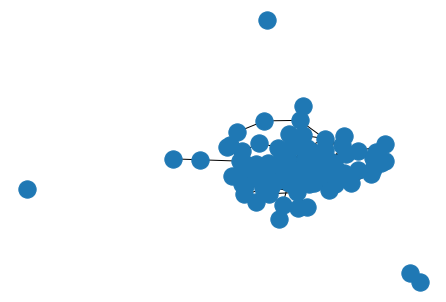

In [7]:
nx.draw(g)

# 2. Preferential attachment (BA) generator

In [8]:
def select_targets(g, m):

    # Check if feasible
    if len(g.nodes()) < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0
    for n in g.nodes():
        sum_degree += g.degree(n)

    if sum_degree == 0:
        raise ValueError('Graph has no edges')

    # Compute probabilities
    probabilities = []
    for u in g.nodes():
        prob = g.degree(u) / sum_degree
        probabilities.append(prob)

    # Sample without replacement
    selected = np.random.choice(g.nodes(), size=m, replace=False, p=probabilities)

    return selected

In [9]:
def generate_preferential_attachment_graph(N, m0, m):
    g = nx.Graph()
    for n in range(m0):
        g.add_node(n)
    for n0 in range(1, m0):
        g.add_edge(0, n0)
    for u in range(m0, N):
        targets = select_targets(g, m)
        g.add_node(u)
        for t in targets:
            g.add_edge(u, t)
    return g

In [10]:
g = generate_preferential_attachment_graph(100, 10, 5)

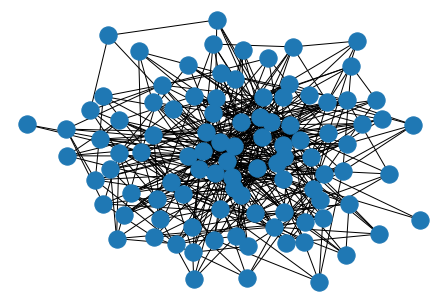

In [11]:
nx.draw(g)